In [2]:
import pandas as pd
import pickle
import re
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

In [25]:
cr = pd.read_csv('cr_preprocessed.csv', encoding = 'utf-8')
cr.drop(['Unnamed: 0'],axis=1,inplace=True)
cr = cr.reset_index()
cr.drop('index',axis=1,inplace=True)
cr

,date,star,title,body,clean_text,stopwords_after,pos_tag,NN,lemmatization
0,2023-02-20,5,Durable Solid excellent,Superlike,['superlike'],['superlike'],"[('superlike', 'NN')]",['superlike'],['superlike']
1,2022-12-08,4,Nice Product,Everything Nice. The Filter connection fitting...,"['everything', 'nice', 'the', 'filter', 'conne...","['everything', 'nice', 'filter', 'connection',...","[('everything', 'NN'), ('nice', 'JJ'), ('filte...","['everything', 'filter', 'connection', 'size',...","['everything', 'nice', 'filter', 'connection',..."
2,2023-01-22,5,After 1.5year Review | Excellence at it best,Posting this review after 1.5year of usage.Thi...,"['posting', 'this', 'review', 'after', 'year',...","['posting', 'review', 'year', 'usage', 'works'...","[('posting', 'VBG'), ('review', 'NN'), ('year'...","['review', 'year', 'usage', 'use', 'clothes', ...","['posting', 'review', 'year', 'usage', 'work',..."
3,2023-01-28,5,Nicee product,Washing quality is praise worthy.,"['washing', 'quality', 'is', 'praise', 'worthy']","['washing', 'quality', 'praise', 'worthy']","[('washing', 'VBG'), ('quality', 'NN'), ('prai...","['quality', 'praise', 'worthy']","['washing', 'quality', 'praise', 'worthy']"
4,2022-12-16,5,The best washing machine ever !!!!,"I have heard people saying , washing machine i...","['i', 'have', 'heard', 'people', 'saying', 'wa...","['heard', 'people', 'saying', 'washing', 'usef...","[('heard', 'NN'), ('people', 'NNS'), ('saying'...","['heard', 'people', 'dirty', 'clothes', 'cloth...","['heard', 'people', 'saying', 'washing', 'usef..."
...,...,...,...,...,...,...,...,...,...
1937,2019-08-21,5,Great product and value for money.,I am writing this after a year's usage...this ...,"['i', 'am', 'writing', 'this', 'after', 'a', '...","['writing', 'year', 'usage', 'one', 'best', 'w...","[('writing', 'VBG'), ('year', 'NN'), ('usage',...","['year', 'usage', 'machines', 'quality', 'make...","['writing', 'year', 'usage', 'one', 'best', 'w..."
1938,2019-11-05,5,Less noise,Less noise,"['less', 'noise']","['less', 'noise']","[('less', 'RBR'), ('noise', 'NN')]",['noise'],['noise']
1939,2019-12-18,5,Easy to use.,Nice product. Better than most popular company...,"['nice', 'product', 'better', 'than', 'most', ...","['nice', 'product', 'better', 'popular', 'comp...","[('nice', 'JJ'), ('product', 'NN'), ('better',...","['product', 'company', 'products', 'anyone', '...","['nice', 'product', 'better', 'popular', 'comp..."
1940,2020-03-10,5,Good product,It’s been 3 months since we have been using it...,"['it', 's', 'been', 'months', 'since', 'we', '...","['months', 'since', 'using', 'happy', 'purchas...","[('months', 'NNS'), ('since', 'IN'), ('using',...","['months', 'purchase', 'dryer', 'noise', 'leve...","['month', 'since', 'using', 'happy', 'purchase..."


In [6]:
cr['clean_text'] = pd.Series(dtype='object')
cr['stopwords_after'] = pd.Series(dtype='object')
cr['pos_tag'] = pd.Series(dtype='object')
cr['NN'] = pd.Series(dtype='object')
cr['lemmatization'] = pd.Series(dtype='object')

stops = stopwords.words('english')
stops_list = ["machine", "www", "http","com","ref","aspose", "\n", "installation","programme","programe","wash",
              "washer","washer", "com","amazon","ppx","loaded","loading","load","bosch","product","washing","wash","water"]

for i in range(len(stops_list)):
    stops.append(stops_list[i])


def clean_text(texts): 
    corpus = []
    
    for i in tqdm(range(0, len(texts))):
        
        body = texts[i]
        #body.fillna(data[i])
        body = re.sub('[^a-zA-Z]', ' ', body) # 특수문자 제거 
        body = body.lower().split() # 대문자를 소문자로 변경, 문장을 단어 단위로 구분
        
        # 
        cr['clean_text'][i] = body
        
        no_stops = [word for word in body if not word in stops] # 불용어 제거
        cr['stopwords_after'][i] = no_stops
        
        tokens_pos = nltk.pos_tag(cr['stopwords_after'][i]) # pos tagging (품사 태깅)
        cr['pos_tag'][i] = tokens_pos
        
        NN_words = [] # 명사는 NN을 포함하고 있음을 알 수 있음(명사만 추출)
        for word, pos in tokens_pos:
            if 'NN' in pos:
                NN_words.append(word)
                cr['NN'][i] = NN_words
                
        wlem = nltk.WordNetLemmatizer() # Lemmatization(원형(lemma) 찾기) # nltk에서 제공되는 WordNetLemmatizer을 이용
        lemmatized_words = []
        for words in no_stops:
            new_word = wlem.lemmatize(words)
            lemmatized_words.append(new_word)
            cr['lemmatization'][i] = lemmatized_words
        
        corpus.append(no_stops) 
        
    return corpus

In [7]:
clean_text(cr['body'])

  0%|          | 0/1942 [00:00<?, ?it/s]

100%|██████████| 1942/1942 [00:15<00:00, 121.96it/s]


[['superlike'],
 ['everything',
  'nice',
  'filter',
  'connection',
  'fitting',
  'standard',
  'size',
  'difficult',
  'get',
  'fitting',
  'local',
  'shops',
  'pls',
  'make',
  'standard',
  'helpful'],
 ['posting',
  'review',
  'year',
  'usage',
  'works',
  'like',
  'magic',
  'super',
  'easy',
  'use',
  'clean',
  'clothes',
  'low',
  'noise',
  'levels',
  'superb',
  'engineering',
  'excellent',
  'user',
  'convenience'],
 ['quality', 'praise', 'worthy'],
 ['heard',
  'people',
  'saying',
  'usefull',
  'dirty',
  'clothes',
  'clothes',
  'get',
  'cleaned',
  'properly',
  'using',
  'felt',
  'misconception',
  'clothes',
  'getting',
  'super',
  'clean',
  'whole',
  'family',
  'happy',
  'wm',
  'thoughts',
  'even',
  'think',
  'twice',
  'go',
  'thank',
  'thank'],
 ['rinses',
  'clothing',
  'clean',
  'washthe',
  'foam',
  'surf',
  'remains',
  'last',
  'wave',
  'clear'],
 ['delivered',
  'one',
  'day',
  'flat',
  'thats',
  'good',
  'experie

In [15]:
## i, x 등 길이가 2 이하인 문자 제거
error = []

for i in tqdm(range(0,len(cr['lemmatization']))):
    try:
        error.append(int(cr['lemmatization'][i]))
    except: 
        #continue
        print("It's done",i)
    
    try:
        for j in cr['lemmatization'][i]:
            if (len(j) < 3):
                cr['lemmatization'][i].remove(j)
                print(cr['lemmatization'][i])
    except:
        continue

100%|██████████| 1942/1942 [00:00<00:00, 36262.26it/s]

It's done 0
It's done 1
It's done 2
It's done 3
It's done 4
It's done 5
It's done 6
It's done 7
It's done 8
It's done 9
It's done 10
It's done 11
It's done 12
It's done 13
It's done 14
It's done 15
It's done 16
It's done 17
It's done 18
It's done 19
It's done 20
It's done 21
It's done 22
It's done 23
It's done 24
It's done 25
It's done 26
It's done 27
It's done 28
It's done 29
It's done 30
It's done 31
It's done 32
It's done 33
It's done 34
It's done 35
It's done 36
It's done 37
It's done 38
It's done 39
It's done 40
It's done 41
It's done 42
It's done 43
It's done 44
It's done 45
It's done 46
It's done 47
It's done 48
It's done 49
It's done 50
It's done 51
It's done 52
It's done 53
It's done 54
It's done 55
It's done 56
It's done 57
It's done 58
It's done 59
It's done 60
It's done 61
It's done 62
It's done 63
It's done 64
It's done 65
It's done 66
It's done 67
It's done 68
It's done 69
It's done 70
It's done 71
It's done 72
It's done 73
It's done 74
It's done 75
It's done 76
It's done

## LDA

In [16]:
cr2 = cr.copy()
cr2 = cr2.dropna()

In [17]:
import warnings
from gensim.corpora.dictionary import Dictionary
from gensim import corpora

In [18]:
dictionary = corpora.Dictionary(cr2['lemmatization'])
dictionary.filter_extremes(no_below = 5, no_above = 0.8) #출현빈도 n번 이하 제외, no_above 자주 등장하는 비율 높으면 제외(70%)
corpus = [dictionary.doc2bow(text) for text in cr2['lemmatization']]

# 최적의 토픽 수 찾기

In [19]:
import matplotlib.pyplot as plt
import gensim
from gensim import corpora
from gensim import models
from gensim.models import LdaModel
from gensim.models import TfidfModel
from gensim.models import CoherenceModel

### perplexity
- 토픽 개수마다 학습
- 가장 낮은 값을 보이는 구간을 통해 최적화된 토픽의 개수 선택
- 해당 모델이 결과를 얼만큼 정확하게 예측했는지 알 수 있음
- 주의 : perplexity 가 낮다고 해서 결과 해석이 용이하다는 것은 아님

### Coherence
- 토픽의 일관성을 알 수 있음
- 높을 수록 의미론적으로 일관성이 있다고 판단
- 해당 모델이 얼마나 의미 있는 결과를 내는지 확인

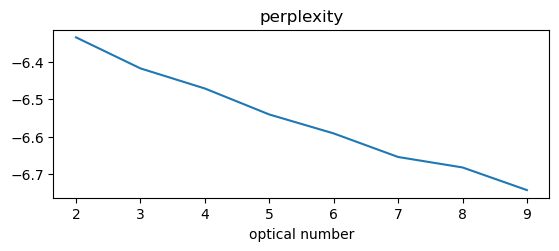

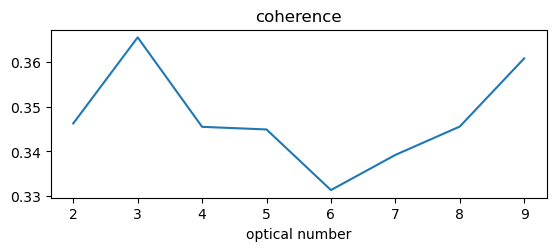

In [20]:
# perplecxity
perplexity_values = []

for i in range(2,10):
    lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    perplexity_values.append(lda_model.log_perplexity(corpus))

# coherence    
coherence_values = []

for i in range(2,10):
    lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    coherence_model = CoherenceModel(model = lda_model, texts = cr2['lemmatization'], dictionary = dictionary)
    coherence_lda = coherence_model.get_coherence()
    coherence_values.append(coherence_lda)    
    
x = range(2,10)

plt.subplot(2,1,1)
plt.plot(x, perplexity_values)
plt.title("perplexity")
plt.xlabel("optical number")
plt.show()


plt.subplot(2,1,2)
plt.plot(x, coherence_values)
plt.title("coherence")
plt.xlabel("optical number")
plt.show()

## 토픽

In [23]:
import gensim

NUM_TOPICS = 3
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15) #passes는 알고리즘의 동작 횟수
topics = lda_model.print_topics(num_words=10) #총 n개의 단어만 출력

for topic in topics:
    print(topic)

(0, '0.045*"good" + 0.030*"excellent" + 0.022*"quality" + 0.019*"nice" + 0.015*"delivery" + 0.013*"noise" + 0.012*"performance" + 0.012*"using" + 0.012*"month" + 0.011*"buy"')
(1, '0.039*"service" + 0.023*"good" + 0.019*"day" + 0.018*"time" + 0.013*"money" + 0.013*"delivery" + 0.013*"customer" + 0.012*"demo" + 0.012*"value" + 0.010*"one"')
(2, '0.028*"good" + 0.019*"clothes" + 0.019*"use" + 0.018*"noise" + 0.013*"best" + 0.012*"easy" + 0.011*"one" + 0.010*"quality" + 0.010*"clean" + 0.010*"using"')


# 시각화

In [24]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

c:\Users\daybi\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


# LDA (callback option)

In [48]:
from gensim.models.callbacks import CoherenceMetric
from gensim.models.callbacks import PerplexityMetric
import logging


perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')
coherence_logger = CoherenceMetric(corpus=corpus, coherence="u_mass", logger='shell')

In [49]:
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=NUM_TOPICS, passes=30, callbacks=[coherence_logger, perplexity_logger])

topics = lda_model.print_topics(num_words=5)

for topic in topics:
    print(topic)

(0, '0.047*"good" + 0.018*"quality" + 0.017*"using" + 0.016*"use" + 0.015*"noise"')
(1, '0.043*"money" + 0.034*"value" + 0.023*"noise" + 0.020*"best" + 0.018*"nice"')
(2, '0.021*"excellent" + 0.019*"good" + 0.016*"working" + 0.013*"stand" + 0.011*"time"')
(3, '0.047*"installation" + 0.038*"service" + 0.019*"day" + 0.017*"delivery" + 0.016*"good"')


In [50]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)